# Introduction

The travelling salesman problem is the study of the following question : "Given a list of cities and the distances between each pair of cities, what is the shortest possible route that visits each city and returns to the origin city?"

We will try to answer this NP-hard problem by finding the shortest path visiting evert node of a non-oriented graph. This path is called a Hamiltonian path.

## Exercise 1. Exact solution

We represent a weighted, non-oriented graph with an adjacency list. We also assume
that a graph is always connected, i.e. that it is always possible to reach a node from any
other node.

#### Number of Hamiltonian paths in a complete graph of size n


Among a set N of n nodes, we can describe each Hamilton path as an ordered combinaison of all elements of N. It's a sequence of nodes. In a complete graph, all nodes are connected so every sequence n describes a Hamiltonian path.The number of possible sequences ${\displaystyle A_{n}^{n}}=n!$.

The number of Hamiltonian paths in a complete graph of size n is $n!$.

#### Enumerating all Hamiltonian paths starting from a node i in a graph of size n  and returning the shortest one.

We build a recursive function that returns the list of all existing Hamiltonian paths. 

In [1]:
import networkx as nx

In [2]:
def HamiltonRecursiveLister(PathList_,Path,Graph,Currentnode): 
    Path.append(Currentnode)#C=O(1)
    if len(Path)==Graph.number_of_nodes():#C=O(1)
        PathList_.append(Path.copy()) #C=O(n)
        del Path[-1]#C=O(1)
    else:
        for node in Graph.neighbors(Currentnode):#C=O(n-1*C(HamiltonRecursiveLister(Graph of size n-1)))
            if node not in Path:
                PathList_=HamiltonRecursiveLister(PathList_,Path,Graph,node) #C=O(HamiltonRecursiveLister(Graph of size n-1))
        del Path[-1]#C=O(1)
                
    
    return PathList_#C=O(1)
    

For a graph of size N, the time complexity is $N*(N-1)!=N!$ because in the worst case, we have $N-1!$ HP our recursive function end $N-1!$ times and each end have a complexity of $N$ dues to the copy.

We build a test to checks if our function works properly. One of its shortest Hamilton path is 1, 3, 4, 2 with a length of 3

In [3]:
import matplotlib.pyplot as plt
testG= nx.Graph()
testG.add_nodes_from([1,2,3,4])
testG.add_weighted_edges_from([(3, 1,1),(3,2,2),(4,2,1),(3,4,1)])
nx.draw_networkx(testG)

In [4]:
print(HamiltonRecursiveLister([],[],testG,1),HamiltonRecursiveLister([],[],testG,2),HamiltonRecursiveLister([],[],testG,3),HamiltonRecursiveLister([],[],testG,4))

[[1, 3, 2, 4], [1, 3, 4, 2]] [[2, 4, 3, 1]] [] [[4, 2, 3, 1]]


We can find mannualy that these are all the correct Hamiltonian paths.

We now build a recursive function that enumerates all Hamiltonian paths starting from a node i in a graph of size n, and returns the shortest one.

In [5]:
#HamiltonRecursiveFinder. Takes in param a graph of size N and a node i
def HRF(Graph,Curentnode,BestPath=[],Bestlength=-1,Pathlength=0,CurentPath=[]): 
    CurentPath.append(Curentnode) #C=O(1)
    
    #the end of our recursive function
    if len(CurentPath)==Graph.number_of_nodes(): #C=O(1) (we assume this number is not calculated)
        if Bestlength>Pathlength or Bestlength==-1: #C=O(1)
            BestPath=CurentPath.copy() #C=O(N)
            Bestlength=Pathlength #C=O(1)
        del CurentPath[-1]
        
    else:
        for node in Graph.neighbors(Curentnode): #C=(n-1)*C(HRF(graph of size n-1))
            if node not in CurentPath:#C=O(1)
                length=Pathlength+Graph[Curentnode][node]['weight']#C=O(1)
                if length < Bestlength  or Bestlength==-1:#C=O(1)
                    BestPath, Bestlength=HRF(Graph,node,BestPath,Bestlength,length,CurentPath)#C=O(HRF(graphe de taille n-1)
        del CurentPath[-1] #C=O(1)
                
    
    return BestPath, Bestlength

We test it for our graph with a known shortest Hamilton Path:

In [6]:

print(HRF(testG,1)==([1, 3, 4, 2], 3))

True


It works.

For a graph of size N, the time complexity is $N*(N-1)!=N!$ because in the worst case, we have $N-1!$ HP each shorter than the previous one so our recursive function end $N-1!$ times and each end have a complexity of $N$ dues to the copy.

####  Solving the Traveling Salesman Problem

We just need to apply our HRF function to every node of the graph and find the best solution.

In [7]:
#Traveling Salesman Problem Solver C=O(n*n!)
def TSPS(Graph):#C=O(1)
    Path=[]#C=O(1)
    length=-1#C=O(1)
    for node in Graph.nodes(): #C=O(n*n!)
        P,d= HRF(Graph,node) #C=O(n!)
        if (d<length or length==-1)and d!=-1:
            Path=P
            length=d
    return Path,length
        

In [8]:
TSPS(testG)

([1, 3, 4, 2], 3)

## Exercise 2. The Nearest Neighbor heuristic

#### Implementing the Nearest Neighbor heuristic

In [9]:
def NNH(Graph,node):
    Path=[node]#C=O(1)
    N=len(Graph)#C=O(1)
    while len(Path)<N:#C=O(n^2)
        successor=-1 #C=O(1)
        d=-1 #C=O(1)
        for nd in Graph.neighbors(node): #C=O(n)
            if nd not in Path and (Graph[nd][node]['weight']<d or d==-1): #C=O(1)
                successor =nd #C=O(1)
                d=Graph[nd][node]['weight'] #C=O(1)
        if successor==-1: return [] 
        node=successor #C=O(1)
        Path.append(node) #C=O(1)
    return Path

In [10]:
NNH(testG,1)

[1, 3, 4, 2]

#### Time complexity

As you can see in our code's comments, we have a time complexity C=O(n^2).

#### Traping the NNH 

We build a graph that will trap the NNH. To do so, we ensure that the last edges that will take the NNH have an extrmly high weight

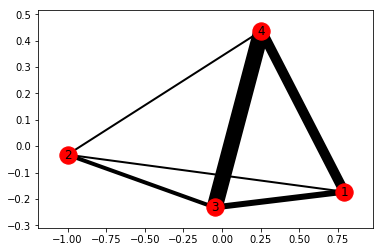

In [11]:
trapG= nx.Graph()
trapG.add_nodes_from([1,2,3,4])
trapG.add_weighted_edges_from([(1, 2,1),(1,3,3),(2,3,2),(2,4,1),(3,4,8),(1,4,5)])
pos = nx.spring_layout(trapG)
nx.draw_networkx_nodes(trapG, pos)
nx.draw_networkx_labels(trapG, pos)
for edg in trapG.edges():
     nx.draw_networkx_edges(trapG, pos, edgelist=[edg],
                       width=2*trapG[edg[0]][edg[1]]["weight"])

In [12]:
print("shortest Hamiltonian path : ",HRF(trapG,1),", solution with NNH:",(NNH(trapG,1)))



shortest Hamiltonian path :  ([1, 3, 2, 4], 6) , solution with NNH: [1, 2, 4, 3]


We found a graph for which this heuristic does not compute the shortest Hamiltonian path

## Exercise 3. The Minimum Spanning Tree heuristic

A spanning tree of a graph G = (V, E) is a subset F of its edges such that (V, F ) is a
tree. A minimum spanning tree (MST) of a graph is a spanning tree that minimizes the sum
of the weights of its edges.

Here is an algorithm that computes a minimum spanning tree (Prim’s algorithm).

Data: Graph G = (V, E)

Result: (V, F ) a MST

F ←∅

W ← x 0 an arbitrary element

while W != V do

    Let (x, y) ∈ E the shortest edge such that x ∈ W and y ∈/ W

    W ← W ∪ y

    F ← F ∪ (x, y)

end

Result: (V, F)

#### Time complexity

If we use an heap queue and the adjacency list of the graph of size n (and in the worst case, n), we can reduce the time complexity to $C= O(n²ln(n))$

Demontration: for each nodes of the queue (n-1 nodes, because the root is not in the queue) we:
     
- get the closest one from graph (the one at the top of the queue) $C=O(1)$
     
- remoove it from the queue $C=O(1)$
    
- update the distances from the graph for all remaining nodes in the queue. $C=O(n * ln(n))$
     
- sort the queue to have the new closest one from the graph at the top of the queue. $C=O(n * ln(n))$

So the final complexity is $C=O(n²ln(n))$


#### Proof that Prim’s algorithm returns a spanning tree.



We use a proof based on induction

Mathematical induction:

    Base case: W=x0, F=∅, is a tree: (WF) is Acyclic and Connected
    
    Induction step: lets assume that the subgraph (W, F ) is a tree, we show that (W U y,F ∪ (x, y)) is a tree, with (x, y) ∈ E the shortest edge such that x ∈ W and y ∈/ W
    
        If we remove any edge e of F, (W,F) is disconnected (definition of a tree). It forms two connected subgraphs W1,W2. x∈W1 (resp W2). y∈/W1 , y∈/W2 and y is connected to W1 (resp W2). (W U y =W1 U y + W2 ,F ∪ (x, y) /{e}) is disconnected. If we remove the edge (x,y), there is, by construction, no edge between y and W. (W U y,F ) is disconnected. If we remove any edge from (W U y,F ∪ (x, y)), it is disconnected. Thus (W U y,F ∪ (x, y)) is a tree.
    
    Conclusion: during each iteration of the while loop, the subgraph (W, F ) is a tree.
    
    At the end of Prim’s algorithm (W, F) is a tree, V=W and F∈E. Prim’s algorithm returns a spanning tree of Graph (V,E).

#### Prim’s algorithm returns  a MST 

let assume that prim's algorithme return a tree PT that is longer than the MST of a graph G(but because the first node is does not mater for the Prims'algorithme, we assume they have the same root) .
they both have the same number of edges (fixed for a tree of n nodes)
lets walk trough the nodes of PT and MST until we find  different edges. (they start from the same node)
 e1=(x-y) and e2=(x-y'). Lets X and Y resp Y' be the disconected tree of PT-{(x-y)} resp PT-{(x-y')} with x ∈ X and y ∈/ X ,y'/X , y ∈ Y and Y', y'∈ Y' and Y
 by construction of PT, e1 ≤ e2. becase both b and b' are not in A.  X U Y' +{e1} is a ST of G: (it contain all nodes of G and if we remoove any egdes of X or Y', they are disconected because they are trees and if we remoove e1, X and Y' are disconected so its a tree). Moreover, the length of X U Y' +{e1} = length(MST)+e1-e2 ≤ length(MST). By definition of the MST,  X U Y' +{e1} = length(MST) and X U Y' +{e1} is a MST. this mst


A tree does not spread throughout sexual intercours. Prim's algorithm return a tree. FALSE. HA HA HA ... (only work for a french guy reading the english question)

#### Implementing Prim's algorithm


We buid two different methodes, one with high time complexity, but we are sure it is working. The other one with lower time complexity (the same as proposed in the time complexity part). We use the first one to verifie the second one.

In [13]:
import numpy as np
def Prims(Graph):
    V=set(Graph.nodes)
    edges=list(trapG.edges())
    sort=np.argsort([trapG[edg[0]][edg[1]]["weight"]for edg in edges]) #sort edges by length.
    E=[edges[s] for s in sort]
    F=[]
    W={list(Graph.nodes())[0]}
    while len(W)<len(V):#C= O(n³ln(n)) #for each edge we find the shortest edge (x,y) such that x ∈ W and y ∈/ W
        for edge in E:#C=O(len(edge)*ln(len(n))) = O(n²ln(n))
            if (edge[0] not in W and edge[1] in W): #C=O(ln(len(W))) =O(ln(n))
                F.append(edge) #C=O(1)
                W.add(edge[0]) #C=O(1)
                break
            elif (edge[1]not in W and edge[0] in W):#C=O(ln(len(W)) =O(ln(n))
                F.append(edge)#C=O(1)
                W.add(edge[1])#C=O(1)
                break
    return (W,F)
        

In [14]:
import math as m
import heapq as hp
def Prims2(Graph):
    
    #Initialisaton 
    
    Node=1 #we assume that our graph as one node caled "1" it's our root
    W=[list(Graph.nodes())[0]] #W is the list of nodes of our tree
    F=[] # F is the list of edges of our tree
    Hqueue=[] #Hqueue is the list of nodes not in our tree sorted by their distance to it:
                    #The smallest weight of the edges that connect them to the tree
                    # inf if the node is not connected to the tree
            
    # Initialisation of the Queue       
    for node in Graph.nodes:
        if node != Node:
            if node in Graph[Node]:
                Hqueue.append((Graph[Node][node]["weight"],(node,Node)))
            else:
                Hqueue.append((m.inf,(node,Node)))
    hp.heapify(Hqueue) # C=O(n ln(n)) (sort algorithme)
                              
    # Main loop of the algorithme. 

    while len(Hqueue)!=0: #at eauch iteration a node leave the queue so there are n-1 iteration C(while)=O(n²ln(n))
        # At each iteration we pop the closest node to the graph (ie, the one at the beggining of the Hqueue)
        Pop=hp.heappop(Hqueue) #C=O(1)
        edge=Pop[1] #C=O(1) 
        Node=Pop[1][0] #C=O(1)
        F.append(edge) #C=O(1) We add the edge to F
        W.append(Node) #C=O(1) We then add the node to W
                              
        #We then update the distances to Graph for each node:
        for i in range(len(Hqueue)): #n iteration max, C(for)=O(n ln(n)
            if Hqueue[i][1][0] in Graph[Node]: #search in Dict: C=O(ln(n))
                if(Graph[Node][Hqueue[i][1][0]]["weight"]<Hqueue[i][0]):
                    Hqueue[i]=(Graph[Node][Hqueue[i][1][0]]["weight"],(Hqueue[i][1][0],Node)) #C=O(1)
                                                                           #(Hqueue[i],Node) as one node in W, one out
        
        hp.heapify(Hqueue) # we sort the heapqueu C=O(n ln(n)) (sort algorithm)
    return W,F

In [15]:
Prims(trapG), Prims2(trapG)

(({1, 2, 3, 4}, [(1, 2), (2, 4), (2, 3)]),
 ([1, 2, 4, 3], [(2, 1), (4, 2), (3, 2)]))

#### Hamiltonian cycle deduced from the MST 

 The triangular inequality is the following inequality:∀x, y, z ∈ V, w(x, z) ≤ w(x, y) + w(y, z),where w(x, y) is the weight of edge x → y (more direct paths are shorter). We assume that a graph verifies the triangle inequality


1- An Hamiltonian cycle of the graph is a spamming tree of the graph. So by deffinition, the length of the MST is shorter or equal than the shortest Hamiltonian cycle SHP of the graph. 

2- Let W be full walk  (visiting all the nodes) of the MST. W as a length of at most twice the length of the MST. Because in the worst case, you have to go trough each edges twice.
W may not be an Hamilton path because of duplicats. (if it is , W=MST=SHP and the MST is the shortest Hamilton path (1-)and length(MST)≤2 length(MST) )
To build the Hamilton path from W , We read W nodes by node. 
each time a node N is seen for the second time, we remoove it from the walk. W(...-N-...-A-N-B-...) became W'(-N-...-A-B-...)
Because of the triangular inequality w(A-B)≤w(A-N)+w(N-B) so the length of W' ≤ length of W ≤ 2 length MST . 

When all duplicat have been remooved, the path is an Hamilton path (each node are in the path exacly ones) and its length  is shorter than twice the length of the MST. Lest call this path HMST. Its the Hamiltonian cycle obtained by visiting the MST

because of (1-) we have: 2 length(MST)≤ 2 length(SHP)
because of (2-) we have: length(H)≤ 2 length(MST)
In conclusion, length(H)≤ 2 length(S)


**Assuming that the graph verifies the triangle inequality, the length of the Hamiltonian cycle obtained by visiting the MST is less than twice the length of the shortest Hamiltonian cycle of the graph.**
